## 時間序列分析作業
我們嘗試使用課堂上所教學到的方法開始分析以下時間序列資料集

資料集連結：

https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/creditcard_applicants.csv


### 讀取資料

In [9]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/creditcard_applicants.csv',index_col=0,parse_dates=True)
df.columns = ['Applicants']
df.head()

,Applicants
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


### 問題一
- 將資料索引設為 'MS'

In [10]:
df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=348, freq=None)

In [11]:
df.index.freq = 'MS'

In [12]:
df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=348, freq='MS')

### 問題二

- 請繪製出時間序列資料集

Populating the interactive namespace from numpy and matplotlib


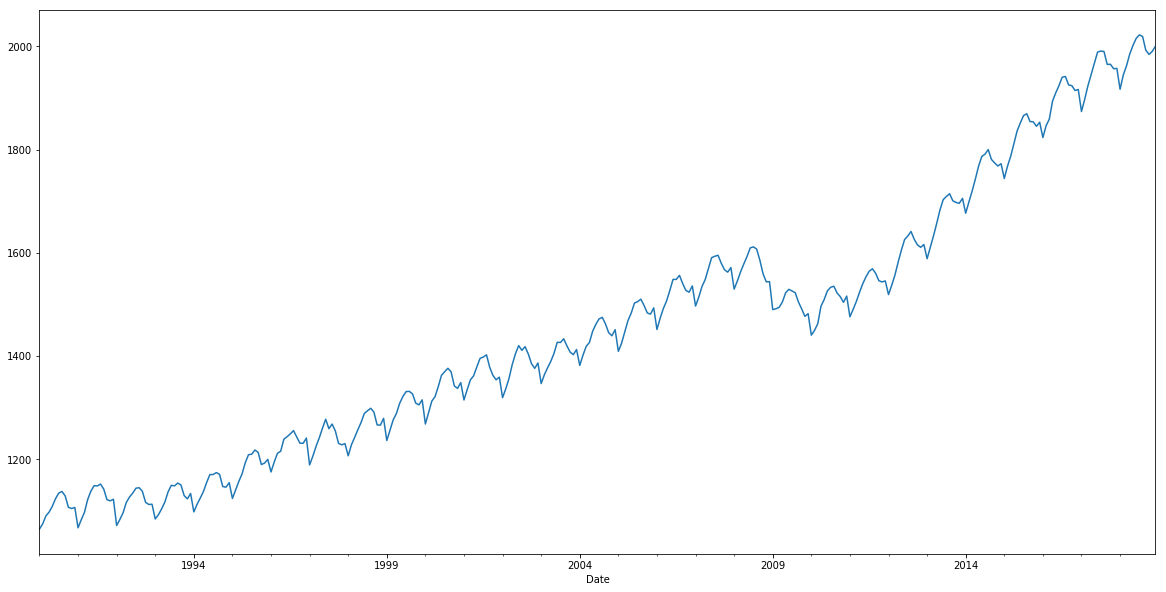

In [14]:
%pylab inline
df['Applicants'].plot(kind = 'line', figsize = [20, 10])

### 問題三

- 執行ETS 分解 (提示：使用加法模型 )


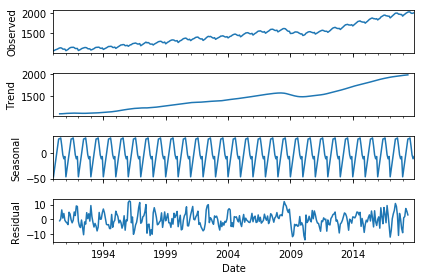

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose  
result = seasonal_decompose(df['Applicants'], model='add')
result.plot();

### 問題四
- 使用Auto Arima 找出最適合參數

In [19]:
from pmdarima import auto_arima 
auto_arima(df['Applicants'],error_action='ignore', seasonal=True).summary()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  348
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -1350.120
Date:                Mon, 03 Jun 2019   AIC                           2718.240
Time:                        09:25:17   BIC                           2752.884
Sample:                             0   HQIC                          2732.034
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3420      0.262      5.124      0.000       0.829       1.855
ar.L1          0.7415      0.032     23.158      0.000       0.679       0.804
ar.L2          0.7142      0.056     12.830      0.000       0.605       0.823
ar.L3         -0.9893      0.032    -30.765      0.000      -1.052      -0.926
ma.L1         -1.1834      0.088    -13.456      0.000      -1.356      -1.011
ma.L2         -0.3347      0.166     -2.011      0.044      -0.661      -0.008
ma.L3          1.2618      0.170      7.443      0.000       0.930       1.594
ma.L4         -0.4292      0.070     -6.119      0.000      -0.567      -0.292
sigma2       132.1454     13.849      9.542      0.000     105.002     159.289
===================================================================================
Ljung-Box (Q):                      855.24   Jarque-Bera (JB):                46.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.67
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 問題五

- 將資料分為訓練與測試資料集

In [20]:
len(df)

348

In [21]:
348 * 0.2

69.60000000000001

In [22]:
train = df.iloc[:len(df)-70]
test = df.iloc[len(df)-70:]

In [23]:
len(train)

278

In [24]:
len(test)

70

### 問題六

- 將 SARIMA(0,1,0)(2,0,0,12) 套用到訓練資料集

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#model = SARIMAX(train['Applicants'],order=(3,1,4)) # 2184.311
model = SARIMAX(train['Applicants'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Applicants   No. Observations:                  278
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood                -916.256
Date:                            Mon, 03 Jun 2019   AIC                           1838.511
Time:                                    09:28:53   BIC                           1849.383
Sample:                                01-01-1990   HQIC                          1842.874
                                     - 02-01-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5117      0.043     11.817      0.000       0.427       0.597
ar.S.L24       0.4396      0.045      9.774      0.000       0.351       0.528
sigma2        39.6865      2.548     15.573      0.000      34.692      44.681
===================================================================================
Ljung-Box (Q):                      108.63   Jarque-Bera (JB):                52.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.42
Prob(H) (two-sided):                  0.93   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 問題七

- 根據測試資料集長度取得預測值

In [28]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Predictions')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [31]:
predictions[0:10]

2013-03-01    1627.501545
2013-04-01    1648.360436
2013-05-01    1667.339050
2013-06-01    1683.719623
2013-07-01    1691.997972
2013-08-01    1698.567102
2013-09-01    1686.964663
2013-10-01    1675.108123
2013-11-01    1671.648065
2013-12-01    1675.290488
Freq: MS, Name: SARIMA(0,1,0)(2,0,0,12) Predictions, dtype: float64

### 問題八
- 同時繪製預測與測試資料集

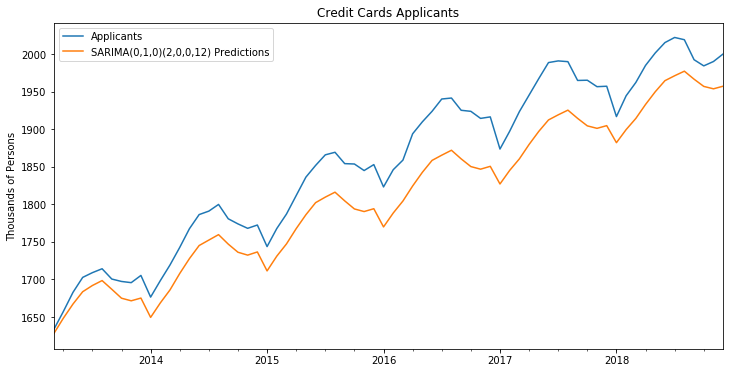

In [32]:
title='Credit Cards Applicants'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Applicants'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 問題九

- 用MSE 與 RMSE 評估模型

In [34]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
error1 = mean_squared_error(test['Applicants'], predictions)
error2 = rmse(test['Applicants'], predictions)
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {error1:11.10}')
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {error2:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 2392.343225
SARIMA(0,1,0)(2,0,0,12) RMSE Error:  48.9115858


In [35]:
48.9115858 ** 2

2392.3432254707614

### 問題十

- 利用全資料集建立模型，並作出一年份的預測

In [36]:
model = SARIMAX(df['Applicants'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Forecast')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [37]:
fcast[0:10]

2019-01-01    1960.423880
2019-02-01    1985.270286
2019-03-01    2005.854537
2019-04-01    2027.323764
2019-05-01    2045.564010
2019-06-01    2062.021317
2019-07-01    2066.566155
2019-08-01    2064.548442
2019-09-01    2039.725713
2019-10-01    2035.514022
Freq: MS, Name: SARIMA(0,1,0)(2,0,0,12) Forecast, dtype: float64

### 問題十一
-  將預測結果與原資料繪製在一張圖作比較

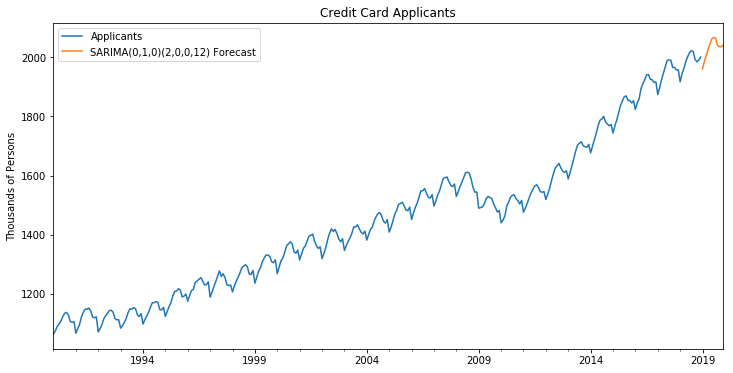

In [38]:
title='Credit Card Applicants'
ylabel='Thousands of Persons'
xlabel=''

ax = df['Applicants'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);